# How to set plot parameters
Short discussion of options for setting plot parameters

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(0,100,10)
y = np.sin(x)

## Setting parameters in plot call
This is fast and convenient. But it might be annoying if one always has to specify some general parameters that are supposed to consistently be a certain way.

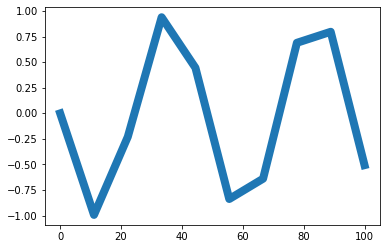

In [6]:
plt.plot(x,y, linewidth=8)

## Specifying pars in a plot function
This becomes useful if there are multiple plot-specific pars to be set. But at a certain point, the argument list might become huge and it might become cumbersome to pass a huge list of pars.

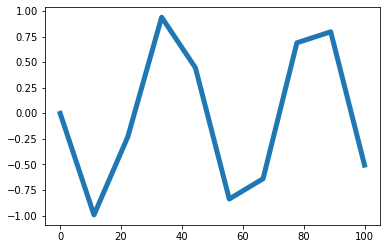

In [9]:
def my_plot(x,y, linewidth=8):
    plt.plot(x,y, linewidth=linewidth)

my_plot(x,y, linewidth=5)

## Passing a dictionary of pars
This solves the problem of creating a huge argument list and or having to passt many araguments on the function call.

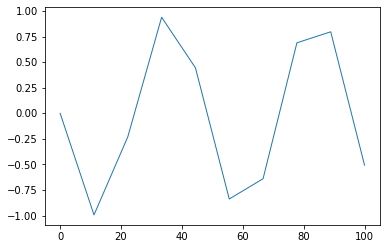

In [12]:
pars = {'linewidth': 1}

def my_plot(x,y, pars):
    plt.plot(x,y, **pars)

my_plot(x,y, pars)

## Changing the rcParams
This is a more general approach to changing certain plot parameters that should always be the same way.
There are several options of changing the rcParams.

### Dynamically updating rcParams
This is a relatively quick way of changin rcParams for a particular python session, inc which one wants to plot multiple plots with the same pars.
But it might be annoying for certain parameters that should always be the same (particularly the last one for pdf.fonttype)

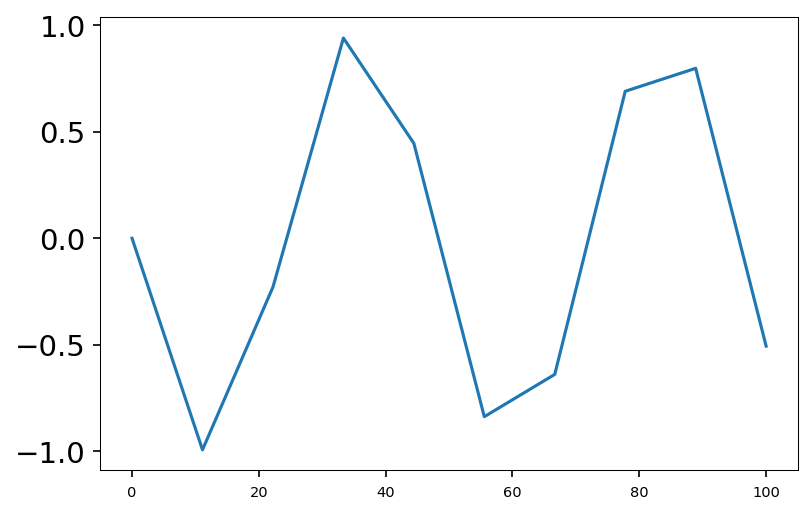

In [15]:
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 14, 
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })

plt.plot(x,y)

### Dynamically updating rcParams using a function
Same as above, but wrapped in a convenience function that could be stored in utils.py and used across multiple plots.

In [ ]:
def set_plot_pars():
    plt.rcParams.update({
        'figure.dpi': 150,
        'figure.max_open_warning': 0, 
        'axes.linewidth': 1,
        'axes.labelsize': 'medium',
        'font.sans-serif': ['Arial'],
        'axes.linewidth': 0.5,
        'axes.labelsize': 7.0,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7, 
        'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
        })


### Updating general pars from modified matplotlibrc file
This is a more general approach. Again, there are several options.
1. Change the user matplorlibrc file in the user matplotlib config root: This will always apply the same pars for a user, but might not do so for other users.
2. Make a local copy of the matplolibrc file in the code repo

#### Make a local copy of the matplolibrc file in the code rep
Matplotlib will look in several locations for a matplotlibrc file (see https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html)
1. If you place your modified copy locally in the file working directory, then this will override the default user file in the matplotlib root. 
2. But this file won't be useful for plot files that do not lie in that same working directory. To use one modified rc file that you placed at the repo root, you can use the following command.

In [ ]:
# Update rcParams from local modified matplotlibrc file in code repo
file_dir = '../../matplotlibrc'  # Ensure that you have placed a local modified copy in file_dir
plt.rcParams.update(mpl.rc_params_from_file(file_dir, fail_on_error=False, use_default_template=True))